In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

### Урок 3. Логистическая регрессия. Log Loss_ДЗ

1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).  
2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. 
3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`.
4. Создайте функцию `calc_pred`, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности.
5. (\*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 

In [5]:
def calc_logloss(y, p):
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

In [12]:
def calc_logloss_1(y, y_pred):
    err = - np.mean(y*np.log(y_pred + 1e-16) + (1.0 - y)*np.log(1.0 - y_pred + 1e-16))
    return err


In [7]:
def calc_logloss_2(y, y_pred):
    np.clip(a=y_pred, a_min=1e-16, a_max=(1 - 1e-16), out=y_pred) # ограничивает значения 
    err = np.mean(- y * np.log(y_pred) - (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [24]:
y_true = np.array([0, 1])
preds = np.array([0, 0.5])
print(f' 0 - {calc_logloss(y_true, preds)}')
print(f' 1 - {calc_logloss_1(y_true, preds)}')
print(f' 2 - {calc_logloss_2(y_true, preds)}')

 0 - nan
 1 - 0.34657359027997253
 2 - 0.3465735902799727


<ipython-input-5-7c9ba78dae11>:2: RuntimeWarning: divide by zero encountered in log
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
<ipython-input-5-7c9ba78dae11>:2: RuntimeWarning: invalid value encountered in multiply
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))


In [23]:
y = np.array([0, 1])
preds = np.array([1, 0], dtype='float64')
print(f' 0 - {calc_logloss(y_true, preds)}')
print(f' 1 - {calc_logloss_1(y_true, preds)}')
print(f' 2 - {calc_logloss_2(y_true, preds)}')

 0 - inf
 1 - 36.841361487904734
 2 - 36.78908102879092


<ipython-input-5-7c9ba78dae11>:2: RuntimeWarning: divide by zero encountered in log
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))


2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. 

In [25]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],  # возраст репетитора
             dtype = np.float64).T # квалификация репетитора

y = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0]) # подходит или нет репетитор
def standardization(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])

In [26]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [27]:
def eval_LR_model(X, y, eta=1e-3, max_iter=1e4, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    #err = calc_logloss(y, sigmoid(np.dot(X, w)))
    errors = []
    n = X.shape[0]
    for i in range(1, 1 + int(max_iter)):
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        grad = 1/n * np.dot((y_pred - y), X)
        w -= eta * grad
        err = calc_logloss(y, sigmoid(np.dot(X, w)))
        errors.append(err)
    if verbose:
        print(f'Итераций: {i}, ошибка: {err:.5f}, веса: {w}')
    return w, errors

Посмотрим, как ошибка меняется с количеством итераций.

In [28]:
w = eval_LR_model(X_st, y, eta=0.1, max_iter=10, verbose=True)
w

Итераций: 10, ошибка: 0.97220, веса: [ 0.36065583 -0.3972585   0.51937535  1.19161524]


(array([ 0.36065583, -0.3972585 ,  0.51937535,  1.19161524]),
 [1.159965552852617,
  1.1371486713885086,
  1.1148118276824541,
  1.0929570104234858,
  1.0715871358410791,
  1.0507062142584689,
  1.0303195102070326,
  1.010433687794308,
  0.9910569304311533,
  0.972199021173242])

In [29]:
_, _ = eval_LR_model(X_st, y, eta=0.1, max_iter=10, verbose=True)

Итераций: 10, ошибка: 0.97220, веса: [ 0.36065583 -0.3972585   0.51937535  1.19161524]


In [30]:
_, _ = eval_LR_model(X_st, y, eta=0.1, max_iter=100, verbose=True)

Итераций: 100, ошибка: 0.55060, веса: [-0.32495521 -0.99723356  0.97913034 -0.06693668]


In [32]:
_, _ = eval_LR_model(X_st, y, eta=0.1, max_iter=500, verbose=True)

Итераций: 500, ошибка: 0.33297, веса: [-0.45062386 -1.01842459  2.94443256 -2.1190821 ]


In [33]:
_, _ = eval_LR_model(X_st, y, eta=0.1, max_iter=1000, verbose=True)

Итераций: 1000, ошибка: 0.25919, веса: [-0.42116566 -0.72960015  4.0167637  -3.66608553]


In [34]:
_, _ = eval_LR_model(X_st, y, eta=0.01, max_iter=10000, verbose=True)

Итераций: 10000, ошибка: 0.25924, веса: [-0.42118835 -0.72928405  4.01536717 -3.66472114]


In [35]:
_, _ = eval_LR_model(X_st, y, eta=0.1, max_iter=10000, verbose=True)

Итераций: 10000, ошибка: 0.07569, веса: [ -0.32811099   2.0817206    9.3224602  -13.80067756]


Построим зависимость ошибки от количества итераций.

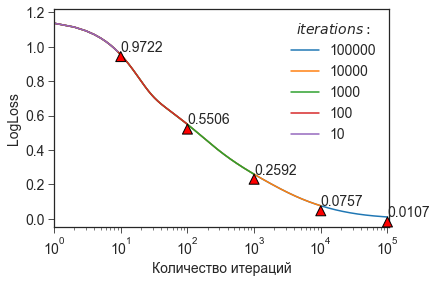

In [36]:
iteration_list = np.logspace(1, 5, 5)
errors_list = []

for it in iteration_list:
    _, err = eval_LR_model(X_st, y, eta=0.1, max_iter=it, verbose=False)
    errors_list.append(err)
    
for i in range(len(errors_list)-1, -1, -1):
    plt.plot(range(int(iteration_list[i])), errors_list[i], label='{:.0f}'.format(iteration_list[i]))
plt.xlim(left=1)
plt.xscale('log')
for i, txt in enumerate(errors_list):
    plt.annotate(txt[-1].round(4), xy=(iteration_list[i], np.tile(errors_list[i], 2)[-1]),
                 arrowprops=dict(facecolor="r", headlength=10, headwidth=10, width=20))    
plt.ylabel('LogLoss')
plt.xlabel('Количество итераций')
plt.legend(title=r'$iterations:$');
plt.show()

Проверим, как влияет скорость обучения на ошибку.

In [37]:
_, _ = eval_LR_model(X_st, y, eta=0.001, verbose=True)

Итераций: 10000, ошибка: 0.55079, веса: [-0.32286763 -0.99669219  0.97842462 -0.0659118 ]


In [38]:
_, _ = eval_LR_model(X_st, y, eta=0.005, verbose=True)

Итераций: 10000, ошибка: 0.33308, веса: [-0.45061477 -1.01793161  2.94257704 -2.11755424]


In [39]:
_, _ = eval_LR_model(X_st, y, eta=0.01, verbose=True)

Итераций: 10000, ошибка: 0.25924, веса: [-0.42118835 -0.72928405  4.01536717 -3.66472114]


In [40]:
_, _ = eval_LR_model(X_st, y, eta=0.1, verbose=True)

Итераций: 10000, ошибка: 0.07569, веса: [ -0.32811099   2.0817206    9.3224602  -13.80067756]


In [41]:
_, _ = eval_LR_model(X_st, y, eta=1, verbose=True)

Итераций: 10000, ошибка: 0.01065, веса: [ -0.48096296   2.05657815  21.42438781 -30.60106992]


Построим зависимость ошибки от скорости обучения.

In [45]:
eta_list = np.logspace(-3, 0, 3)
errors_list = []
iterations = int(1e5)

for eta in eta_list:
    _, err = eval_LR_model(X_st, y, eta=eta, max_iter=iterations, verbose=False)
    errors_list.append(err)

<ipython-input-5-7c9ba78dae11>:2: RuntimeWarning: divide by zero encountered in log
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
<ipython-input-5-7c9ba78dae11>:2: RuntimeWarning: invalid value encountered in multiply
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))


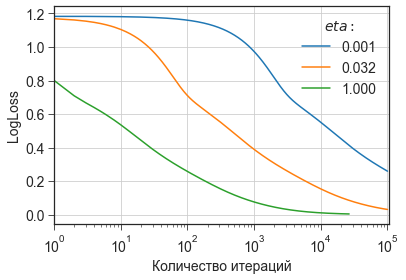

In [46]:
for i in range(len(errors_list)):
    plt.plot(range(iterations), errors_list[i], label='{:.3f}'.format(eta_list[i]))
plt.xlim(left=1)
plt.xscale('log')
plt.ylabel('LogLoss')
plt.xlabel('Количество итераций')
plt.grid()
plt.legend(title=r'$eta:$');

### Вывод: Количество итераций влияет на ошибку. Чем большее число итераций при одной и той же eta, тем меньше ошибка. Скорость обучения также влияет на ошибку. Одном количество итераций получаем, чем выше скорость обучения, тем меньше требуется итераций. 

3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`.

In [51]:
def calc_pred_proba(X, w):
    p = sigmoid(np.dot(X, w))
    #p = 1 / (1 + np.exp(-np.dot(X, w)))
    return p

In [52]:
w, _ = eval_LR_model(X_st, y, eta=0.01, max_iter=1000, verbose=True)

preds = calc_pred_proba(X_st, w)
print(preds)

Итераций: 1000, ошибка: 0.55078, веса: [-0.32305707 -0.99674263  0.97848813 -0.06600631]
[0.33804691 0.42776951 0.3641708  0.38589902 0.62493103 0.57596932
 0.46086408 0.25566362 0.31706926 0.48257595]


In [57]:
def calc_pred_proba_1(X, w):
    return sigmoid(np.dot(X, w))

In [58]:
y_prob = calc_pred_proba_1(X_st, w)
y_prob

array([0.33804691, 0.42776951, 0.3641708 , 0.38589902, 0.62493103,
       0.57596932, 0.46086408, 0.25566362, 0.31706926, 0.48257595])

4. Создайте функцию `calc_pred`, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности.

In [59]:
def calc_pred_0(X, w, threshold=0.5):
    p = calc_pred_proba_1(X, w)
    out = (p > threshold).astype(int)
    return out

In [63]:
y_pred = calc_pred_0(X_st, w, threshold=0.5)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [64]:
def calc_pred(X, w, threshold=0.5):
    probs = calc_pred_proba(X, w)
    # labels = np.where(probs >= threshold, 1, 0)
    labels = (probs >= threshold).astype(int)
    return labels

In [65]:
print(calc_pred(X_st, w))
print(y)

[0 0 0 0 1 1 0 0 0 0]
[0 0 0 1 1 1 1 0 0 0]


5. Посчитайте accuracy, матрицу ошибок, precision и recall, а также F1-score.

In [66]:
def calc_conf_matrix(y_pred, y):
    conf_matrix = np.array([[0]*(len(set(y))) for i in range(len(set(y)))])
    for pred, exp in zip(y_pred, y):
        conf_matrix[int(pred)][int(exp)] += 1
    return conf_matrix

In [67]:
conf = calc_conf_matrix(y_pred, y)
conf

array([[6, 2],
       [0, 2]])

In [68]:
def pres_recall(conf_matrix):
    recall = conf_matrix[0][0]/np.sum(conf_matrix[:, 0])
    pres = conf_matrix[0][0]/np.sum(conf_matrix[0, :])
    return recall, pres

In [69]:
recall, pres = pres_recall(conf); recall, pres

(1.0, 0.75)

In [70]:
def metrics(y, y_pred):
    TP = ((y == 1) & (y_pred == 1)).sum() # 4
    TN = ((y == 0) & (y_pred == 0)).sum() # 4
    FN = ((y == 1) & (y_pred == 0)).sum() # 1
    FP = ((y == 0) & (y_pred == 1)).sum() # 1
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)  
    precision = TP / (TP + FP)  
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

In [71]:
y_pred = calc_pred(X_st, w)
print('Accuracy: \t{:.2}\nRecall: \t{:.2}\nPrecision: \t{:.2}\nF1-score: \t{:.2}'\
      .format(*metrics(y, y_pred)[:]))

Accuracy: 	0.8
Recall: 	1.0
Precision: 	0.5
F1-score: 	0.67


In [72]:
accuracy = 100.0 - np.mean(np.abs(y_pred - y) * 100.0)
accuracy

80.0

In [73]:
# другой вариант заполнения матрицы ошибок
cmatrix = np.zeros((2, 2))
for i in range(len(y)):
    cmatrix[y[i]][y_pred[i]] += 1
cmatrix.astype(int)

array([[6, 0],
       [2, 2]])

In [74]:
def calc_acc(y_pred, y):
    return np.sum([y_pred[i] == y[i] for i in range(len(y))])/len(y)

In [75]:
calc_acc(y_pred, y)

0.8